In [3]:
import numpy as np
import pandas as pd
from scipy import stats


- .rvs: random values for simulation
- .pmf + .pdf: =
- .cdf + .ppf: <=
- .sf + .isf: >

In [5]:
die_dist = stats.randint(1,7)
die_dist

In [8]:
# Working with distributions. rvs(()) shows me 5 rows 2 cols of random values
die_dist.rvs((5,2))

array([[2, 2],
       [6, 6],
       [4, 5],
       [5, 3],
       [2, 4]])

In [9]:
# Whats the probability of rolling a 4? 4 is a discrete variable, so us pmf
die_dist.pmf(4)


0.16666666666666666

In [10]:
# What is the probablity that we roll a 3 or less? Use cdf
die_dist.cdf(3)

0.5

In [19]:
# What is the likelihood we roll greater than 2? Use sf
die_dist.sf(1)

0.8333333333333334

In [12]:
# What is the probability of rolling a 1?
die_dist.pmf(1)

0.16666666666666666

In [16]:
#expiremental
size = 10_000
roll = np.random.randint(1,7, size)
(roll == 1).mean()

0.17

In [20]:
# What is the probability of rolling a 4 or greater?
die_dist.sf(3)

0.5

In [21]:
#expiremental
size = 10_000
roll = np.random.randint(1,7, size)
(roll >= 4).mean()

0.498

In [31]:
# 33% of values will be greater than what number? Use isf
die_dist.isf(1/3)

4.0

In [37]:
#expiremental
size = 10_000
roll = np.random.randint(1,7, size)
(roll > 4).mean()

0.3281

In [39]:
# Settings to make my plot and fonts bigger without having to do it every time
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(13, 6))
plt.rc('font', size=14)

Suppose that a store's daily sales are normally distributed with a mean of 12,000 dollars and standard deviation of 2000 dollars. How much would the daily sales have to be to be in the top 10% of all days?

In [47]:
# Normal dist, given mean an std. want to now sales @ top 10%
μ = 12000
σ = 2000

sales = stats.norm(μ, σ)

top_10 = sales.ppf(.9)
round(top_10,2)

14563.1

In [50]:
def distributions_example7(μ, σ):
    sales = stats.norm(μ, σ)
    top_10_percent_cutoff = sales.ppf(.9)
    x = np.arange(μ - 4*σ, μ + 4*σ, 100)
    y = sales.pdf(x)

    plt.plot(x, y, color='black')
    plt.vlines([μ, sales.ppf(.9)], 0, [sales.pdf(μ), sales.pdf(sales.ppf(.9))], linestyle=':')
    plt.title(f'A Normal Distribution with μ={μ}, σ={σ}')

    x1 = np.arange(top_10_percent_cutoff, μ + 4*σ)
    y1 = sales.pdf(x1)

    plt.fill_between(x1, y1, color='darkseagreen')

    plt.annotate(f'${top_10_percent_cutoff:,.2f}', (top_10_percent_cutoff, sales.pdf(top_10_percent_cutoff)),
                 xytext=(15000, .0001), arrowprops={'arrowstyle': '->'})
    plt.annotate(f'Top 10% of Sales', (15500, .000025), xytext=(15500, .00005), arrowprops={'arrowstyle': '->'})
    plt.annotate(f'Average Sales, ${μ:,.2f}', (μ, sales.pdf(μ)), xytext=(13300, .00018), arrowprops={'arrowstyle': '->'})

    plt.ylabel('P(X = x)')
    plt.xlabel('x')


A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.
What is the probability that no cars drive up in the noon hour?
What is the probability that 3 or more cars come through the drive through?
How likely is it that the drive through gets at least 1 car?

Text(0, 0.5, '$P(X = x)$')

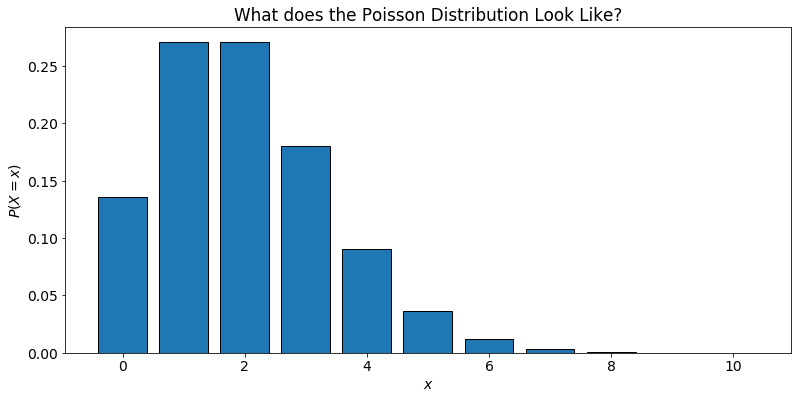

In [54]:
μ = 2
# Using Poisson Distribution & we can use pmf (probability mass function)
# pmf = a point(only for discrete distributions)
x = np.arange(0,11)
y = stats.poisson(2).pmf(x)
plt.bar(x,y, ec="black")
plt.title("What does the Poisson Distribution Look Like?")
plt.xlabel('$x$')
plt.ylabel('$P(X = x)$')

In [55]:
# What is the probability that no cars drive up in the noon hour?
# Avg goes in poisson(2). Using pmf to see probability of 0 cars.
# Theoretical Approach
stats.poisson(2).pmf(0)

0.1353352832366127

In [63]:
# Experimental approach using simulations
cars = np.random.poisson(2,10_000)
(cars == 0).mean()

0.1321

In [56]:
# What is the probability that 3 or more cars come through the drive through? use sf
stats.poisson(2).sf(2)


0.32332358381693654

In [65]:
# Expiramental that 3 or more cars come through the drive through?
cars = np.random.poisson(2, 10_000)
(cars >= 3).mean()

0.3211

In [66]:
# How likely is it that the drive through gets at least 1 car?
stats.poisson(2).sf(0)

0.8646647167633873

In [67]:
# Expiramental that the drive through gets at least 1 car?
cars = np.random.poisson(2,10_000)
(cars >=1).mean()

0.865

2 Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:
What grade point average is required to be in the top 5% of the graduating class? What GPA constitutes the bottom 15% of the class? An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship? If I have a GPA of 3.5, what percentile am I in?

In [72]:
#Going to use normal dist
mean = 3
std = .3
grade = stats.norm(mean,std).ppf(.95)
grade

3.4934560880854417

In [81]:
# Experimental approach
size = 100_000
grade = np.random.normal(mean,std,size)
(pd.Series(grade)).quantile(.95)

3.49535067866907

In [80]:
#What GPA constitutes the bottom 15% of the class? 
grade = stats.norm(mean,std).ppf(.15)
grade

2.689069983151863

In [82]:
# Experimental approach
grade = np.random.normal(mean,std,size)
pd.Series(grade).quantile(.15)

2.6884032161398164

In [83]:
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this 
# scholarship?
grade = stats.norm(mean,std).ppf([.2,.3])
grade

array([2.74751363, 2.84267985])

In [85]:
# Experimental approach
grade = np.random.normal(mean,std,size)
pd.Series(grade).quantile([.2,.3])


0.2    2.750379
0.3    2.845200
dtype: float64

In [93]:
# If I have a GPA of 3.5, what percentile am I in?
grade = stats.norm(mean,std).cdf(3.5)
grade

0.9522096477271853

In [95]:
# Experimental approach
grade = np.random.normal(mean,std,size)
1 - (grade >= 3.5).mean()

0.9514

In [108]:
#If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of 
# getting more than 3 heads?
n = 8
p = .5
flip = stats.binom(n,p).pmf(3)
flip

0.21875000000000014

In [113]:
# Experimental
size = 100_000
heads = np.random.binomial(n,p,size)
(heads == 3).mean()

0.21614

In [114]:
# What is the probability of getting more than 3 heads?
flip = stats.binom(n,p).sf(3)
flip

0.6367187499999999

In [115]:
# Experimental
heads = np.random.binomial(n,p,size)
(heads > 3).mean()

0.63829

In [116]:
#3 There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that
# Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive
# past both have data science students on them?
n = 2
p = .25
billboard = stats.binom(n,p).pmf(2)
billboard


0.0625

In [117]:
# Experimental
size = 100_000
billboard = np.random.binomial(n,p,size)
(billboard == 2).mean()

0.06325

In [154]:
#4 Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. 
# If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able 
# to buy some poptarts on Friday afternoon?
# Normal dist
mean = 3
std = 1.5
n = 17
poptarts = stats.norm(mean,std).cdf(4)
poptarts

0.7475074624530771

In [152]:
poptarts = np.random.normal(mean,std,size)
(poptarts <= 4).mean()

0.74892